In [1]:
# !pip install sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df=pd.read_csv("D:\Data Analysis & Python\Project Datasets\hackthedata\Dataset Hack-the-data.csv")
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2759,47,management,married,primary,no,4151,yes,no,unknown,14,may,114,1,-1,0,unknown,no
1076,59,housemaid,divorced,unknown,no,873,yes,no,unknown,7,may,152,3,-1,0,unknown,no
8586,28,unemployed,married,secondary,no,655,yes,no,unknown,4,jun,606,2,-1,0,unknown,no
27008,39,entrepreneur,single,tertiary,no,1837,no,no,cellular,29,jan,199,1,-1,0,unknown,no
42907,36,entrepreneur,divorced,tertiary,no,3407,no,no,cellular,9,jun,993,4,85,4,success,yes


In [3]:
# Using describe to look for outliers
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Understanding Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isna().sum().sort_values()

age          0
previous     0
pdays        0
campaign     0
duration     0
month        0
day          0
poutcome     0
contact      0
housing      0
balance      0
default      0
education    0
marital      0
job          0
loan         0
y            0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [9]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [10]:
dk=df.copy()

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

c=['job', 'marital', 'education','default', 'housing', 'loan','contact','month','poutcome','y']
for i in c:
    print(i," : \n",dk[i].unique())    
    dk[i]= label_encoder.fit_transform(dk[i])
    print(i," : ",dk[i].unique())

job  : 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
job  :  [ 4  9  2  1 11  5  0  7  6 10  3  8]
marital  : 
 ['married' 'single' 'divorced']
marital  :  [1 2 0]
education  : 
 ['tertiary' 'secondary' 'unknown' 'primary']
education  :  [2 1 3 0]
default  : 
 ['no' 'yes']
default  :  [0 1]
housing  : 
 ['yes' 'no']
housing  :  [1 0]
loan  : 
 ['no' 'yes']
loan  :  [0 1]
contact  : 
 ['unknown' 'cellular' 'telephone']
contact  :  [2 0 1]
month  : 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
month  :  [ 8  6  5  1 10  9  2  4  3  7  0 11]
poutcome  : 
 ['unknown' 'failure' 'other' 'success']
poutcome  :  [3 0 1 2]
y  : 
 ['no' 'yes']
y  :  [0 1]


In [11]:
dk.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


<AxesSubplot:>

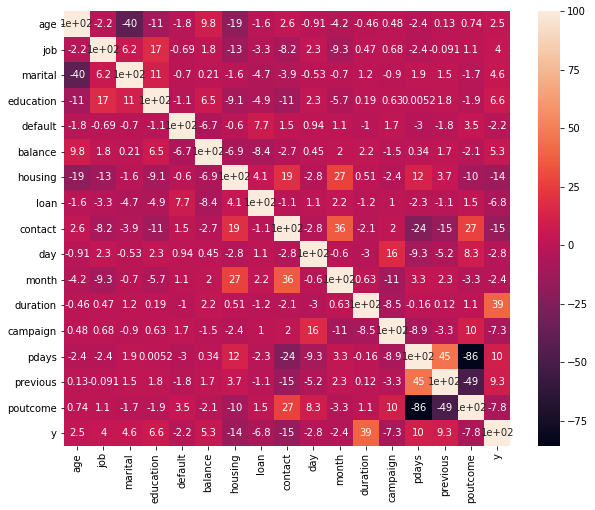

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(dk.corr(method ='pearson', min_periods=1)*100,annot=True)

In [13]:
#To analysize the data with YES outcomes
filt = (dk['y'] == 1)
dyes = dk[filt]

In [14]:
dyes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39922,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
39923,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
39924,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
39925,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
39926,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45207,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45208,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45209,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


<AxesSubplot:>

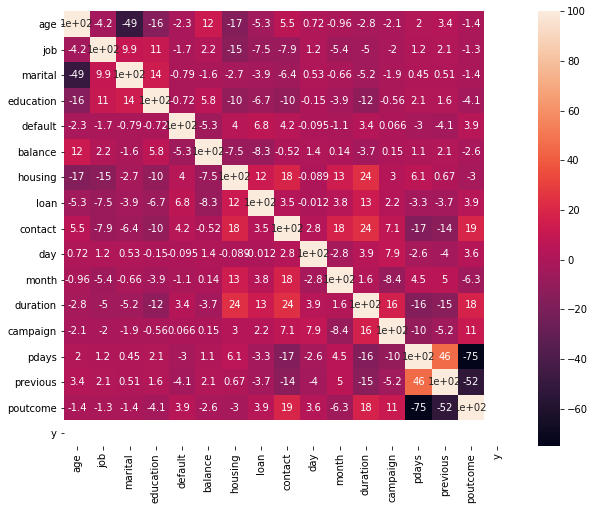

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(dyes.corr(method ='pearson', min_periods=1)*100,annot=True)

In [16]:
X = dk.drop(['y'],axis=1)
y = dk['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print('Dimensions of train dataset:',X_train.shape)
print('Dimensions of test dataset:',X_test.shape)

#defining dictionaries for storing results of different models and comparing 
sc = {}
rn = {}
rd = {}

Dimensions of train dataset: (36168, 16)
Dimensions of test dataset: (9043, 16)


In [17]:
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# LR

In [18]:
lrr=LogisticRegression()
lrr.fit(X_train,y_train)
lrr_pred=lrr.predict(X_test)
print('accuracy_score:',metrics.accuracy_score(y_test, lrr_pred))

r=cvs(lrr, X, y, cv=10, scoring='accuracy').mean()
sc['Logistic Regression']=r
rn['Logistic Regression']=np.array(np.unique(lrr_pred, return_counts=True))
print('cross val score:',r)

c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.8839986730067455


c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

cross val score: 0.8789006798193031


c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


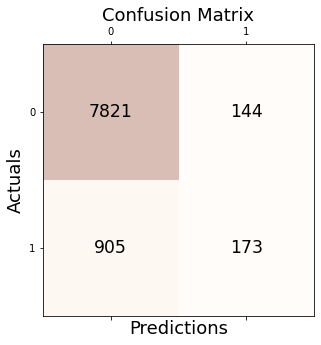

In [19]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=lrr_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [20]:
print('Precision: %.3f' % precision_score(y_test, lrr_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, lrr_pred, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, lrr_pred))
print('F1 Score: %.3f' % f1_score(y_test, lrr_pred, average='weighted'))

base = {}
base['Precision']=precision_score(y_test, lrr_pred, average='weighted')
base['Recall']=recall_score(y_test, lrr_pred, average='weighted')
base['Accuracy']=accuracy_score(y_test, lrr_pred)
base['F1 Score']=f1_score(y_test, lrr_pred, average='weighted')
rd['Logistic Regression'] = base

Precision: 0.854
Recall: 0.884
Accuracy: 0.884
F1 Score: 0.855


# NB

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)
print("accuracy_score",metrics.accuracy_score(y_test, nb_pred))
sc['Naive Bayes']=metrics.accuracy_score(y_test, nb_pred)
rn['Naive Bayes']=np.array(np.unique(nb_pred, return_counts=True))

accuracy_score 0.8444100409156253


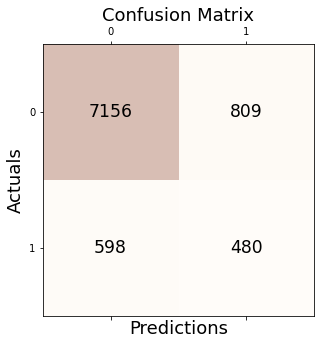

In [22]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=nb_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [23]:
print('Precision: %.3f' % precision_score(y_test, nb_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, nb_pred, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, nb_pred))
print('F1 Score: %.3f' % f1_score(y_test, nb_pred, average='weighted'))

base = {}
base['Precision']=precision_score(y_test, nb_pred, average='weighted')
base['Recall']=recall_score(y_test, nb_pred, average='weighted')
base['Accuracy']=accuracy_score(y_test, nb_pred)
base['F1 Score']=f1_score(y_test, nb_pred, average='weighted')
rd['Naive Bayes'] = base

Precision: 0.857
Recall: 0.844
Accuracy: 0.844
F1 Score: 0.850


# XGB

In [24]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,y_train,eval_metric='auc')
xgb_pred=XGB.predict(X_test)
print("accuracy_score",metrics.accuracy_score(y_test, xgb_pred))
sc['XGB Classifier']=metrics.accuracy_score(y_test, xgb_pred)
rn['XGB Classifier']=np.array(np.unique(xgb_pred, return_counts=True))

c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy_score 0.9035718235098972


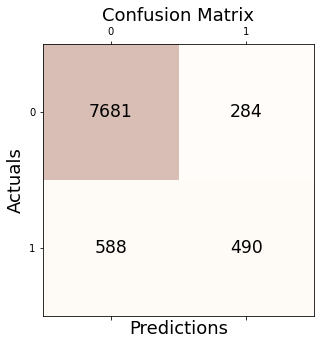

In [25]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=xgb_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
print('Precision: %.3f' % precision_score(y_test, xgb_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, xgb_pred, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, xgb_pred))
print('F1 Score: %.3f' % f1_score(y_test, xgb_pred, average='weighted'))

base = {}
base['Precision']=precision_score(y_test, xgb_pred, average='weighted')
base['Recall']=recall_score(y_test, xgb_pred, average='weighted')
base['Accuracy']=accuracy_score(y_test, xgb_pred)
base['F1 Score']=f1_score(y_test, xgb_pred, average='weighted')
rd['XGB Classifier'] = base

Precision: 0.894
Recall: 0.904
Accuracy: 0.904
F1 Score: 0.897


# DT

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(X_train,y_train)
dtree_pred=dtree.predict(X_test)
print("accuracy_score",metrics.accuracy_score(y_test, dtree_pred))
sc['Decision Trees']=metrics.accuracy_score(y_test, dtree_pred)
rn['Decision Trees']=np.array(np.unique(dtree_pred, return_counts=True))

accuracy_score 0.8789118655313503


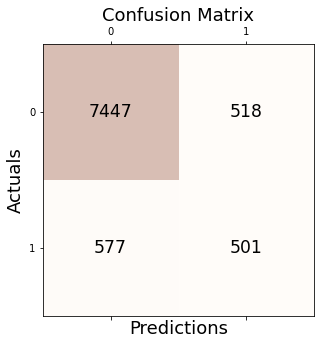

In [28]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=dtree_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
print('Precision: %.3f' % precision_score(y_test, dtree_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, dtree_pred, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, dtree_pred))
print('F1 Score: %.3f' % f1_score(y_test, dtree_pred, average='weighted'))

base = {}
base['Precision']=precision_score(y_test, dtree_pred, average='weighted')
base['Recall']=recall_score(y_test, dtree_pred, average='weighted')
base['Accuracy']=accuracy_score(y_test, dtree_pred)
base['F1 Score']=f1_score(y_test, dtree_pred, average='weighted')
rd['Decision Tree'] = base

Precision: 0.876
Recall: 0.879
Accuracy: 0.879
F1 Score: 0.877


# RF

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators = 40, max_depth=11)
rfm.fit(X_train,y_train)
rfm_pred=rfm.predict(X_test)
print("accuracy_score",metrics.accuracy_score(y_test, rfm_pred))
sc['Random Forest']=metrics.accuracy_score(y_test, rfm_pred)
rn['Random Forest']=np.array(np.unique(rfm_pred, return_counts=True))

accuracy_score 0.9036824062811014


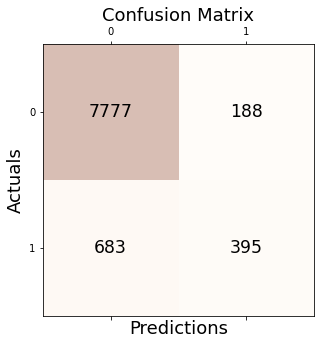

In [31]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=rfm_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
print('Precision: %.3f' % precision_score(y_test, rfm_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, rfm_pred, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, rfm_pred))
print('F1 Score: %.3f' % f1_score(y_test, rfm_pred, average='weighted'))

base = {}
base['Precision']=precision_score(y_test, rfm_pred, average='weighted')
base['Recall']=recall_score(y_test, rfm_pred, average='weighted')
base['Accuracy']=accuracy_score(y_test, rfm_pred)
base['F1 Score']=f1_score(y_test, rfm_pred, average='weighted')
rd['Random Forest Classifier'] = base

Precision: 0.890
Recall: 0.904
Accuracy: 0.904
F1 Score: 0.891


In [33]:
#Accuracy Score of all the models applied
sc

{'Logistic Regression': 0.8789006798193031,
 'Naive Bayes': 0.8444100409156253,
 'XGB Classifier': 0.9035718235098972,
 'Decision Trees': 0.8789118655313503,
 'Random Forest': 0.9036824062811014}

In [34]:
#Distribution of various stress levels according to the various models
rn

{'Logistic Regression': array([[   0,    1],
        [8726,  317]], dtype=int64),
 'Naive Bayes': array([[   0,    1],
        [7754, 1289]], dtype=int64),
 'XGB Classifier': array([[   0,    1],
        [8269,  774]], dtype=int64),
 'Decision Trees': array([[   0,    1],
        [8024, 1019]], dtype=int64),
 'Random Forest': array([[   0,    1],
        [8460,  583]], dtype=int64)}

In [35]:
#Details about various models 
rd

{'Logistic Regression': {'Precision': 0.8544990349259355,
  'Recall': 0.8839986730067455,
  'Accuracy': 0.8839986730067455,
  'F1 Score': 0.8550026170862134},
 'Naive Bayes': {'Precision': 0.8572547638693171,
  'Recall': 0.8444100409156253,
  'Accuracy': 0.8444100409156253,
  'F1 Score': 0.8503006089728973},
 'XGB Classifier': {'Precision': 0.8936273255070852,
  'Recall': 0.9035718235098972,
  'Accuracy': 0.9035718235098972,
  'F1 Score': 0.8965604952197974},
 'Decision Tree': {'Precision': 0.8760644142312257,
  'Recall': 0.8789118655313503,
  'Accuracy': 0.8789118655313503,
  'F1 Score': 0.8774318419129685},
 'Random Forest Classifier': {'Precision': 0.8904500856406075,
  'Recall': 0.9036824062811014,
  'Accuracy': 0.9036824062811014,
  'F1 Score': 0.89078180795337}}